In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df=pd.read_csv('economic_index.csv')
df.drop(columns=['Unnamed: 0','year','month'],inplace=True,axis=1)
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [57]:
import seaborn as sns

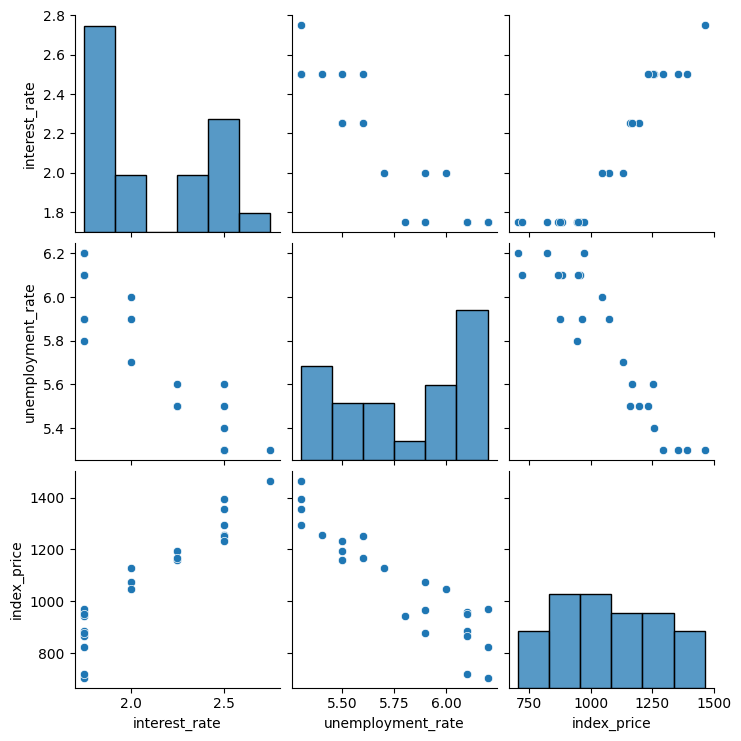

In [58]:
sns.pairplot(df)

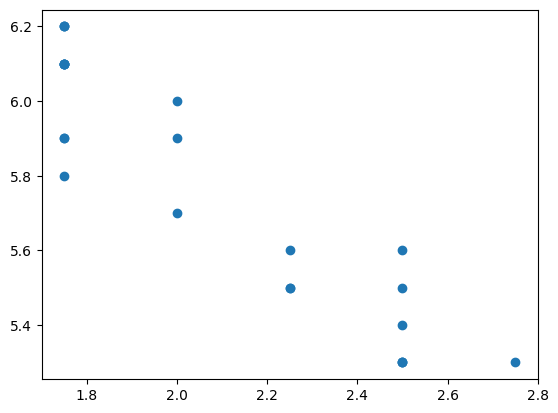

In [59]:
##Visualize the datapoints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'])

In [60]:
##independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [61]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [62]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [73]:
##train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)
X_train.head()

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3


In [74]:
X_test

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9
9,2.25,5.6


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

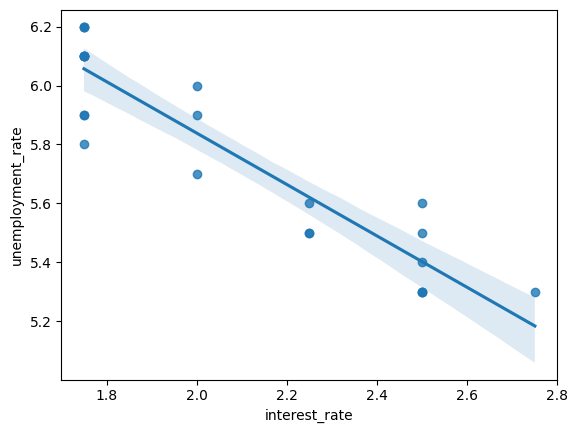

In [78]:
import seaborn as sns
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

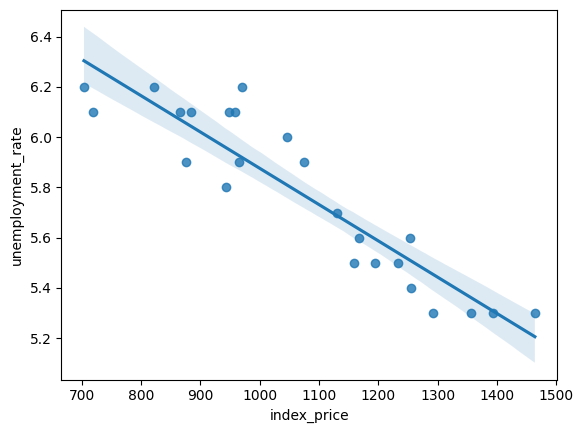

In [81]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])

In [82]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [83]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [84]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [87]:
##cross Validation

from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(reg,X=X_train,y=y_train,scoring='neg_mean_squared_error',cv=3)


In [88]:
print(validation_score)

[-4921.61331265 -7686.87497294 -5135.9962549 ]


In [89]:
##Prediction
y_pred=reg.predict(X_test)

In [90]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [93]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse=np.sqrt(mse)

In [94]:
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [95]:
##R2 and adjusted R2

from sklearn.metrics import r2_score

r2_score=r2_score(y_true=y_test,y_pred=y_pred)
print(r2_score)

0.8278978091457145


In [96]:
adjusted_r2_score=1-(1-r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [97]:
print(adjusted_r2_score)

0.7131630152428576


## Assumptions


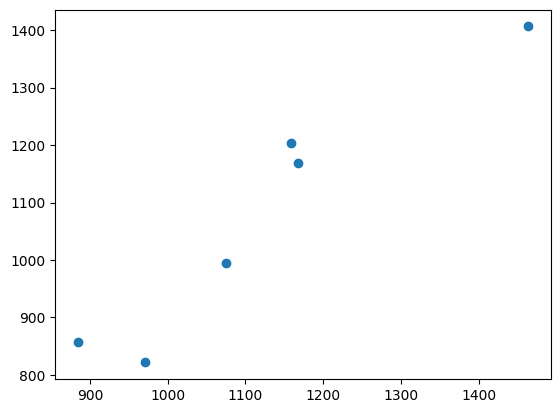

In [98]:
plt.scatter(y_test,y_pred)

In [99]:
residuals=y_test-y_pred

In [100]:
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


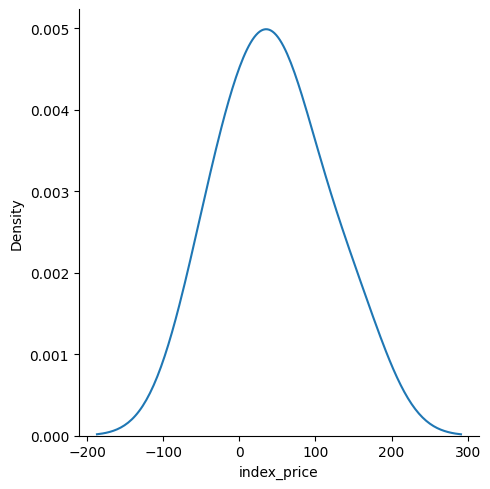

In [102]:
sns.displot(residuals,kind='kde')

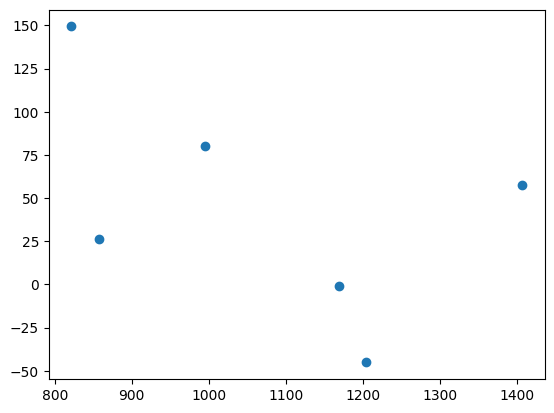

In [103]:
plt.scatter(y_pred,residuals)

In [106]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [107]:
model.summary()

c:\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 10 Jul 2024   Prob (F-statistic):                       0.754
Time:                        00:08:35   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
print(reg.coef_)
print(reg.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443
